In [11]:
import os
import time
import argparse
import gzip
import zipfile
import shutil
import zstandard as zstd
import matplotlib.pyplot as plt
import pandas as pd

### Compression baselines


In [ ]:
# Load datasets



In [ ]:


def compress_gzip(input_path, output_path):
    start = time.time()
    with open(input_path, 'rb') as f_in, gzip.open(output_path, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)
    end = time.time()
    return os.path.getsize(output_path), end - start

def compress_zip(input_path, output_path):
    start = time.time()
    with zipfile.ZipFile(output_path, 'w', compression=zipfile.ZIP_DEFLATED) as zipf:
        zipf.write(input_path, arcname=os.path.basename(input_path))
    end = time.time()
    return os.path.getsize(output_path), end - start

def compress_zstd(input_path, output_path, level=3):
    start = time.time()
    cctx = zstd.ZstdCompressor(level=level)
    with open(input_path, 'rb') as f_in, open(output_path, 'wb') as f_out:
        cctx.copy_stream(f_in, f_out)
    end = time.time()
    return os.path.getsize(output_path), end - start

def benchmark(dataset_path, output_dir):
    original_size = os.path.getsize(dataset_path)
    print(f"\n Benchmark for: {os.path.basename(dataset_path)} ({original_size / 1024:.2f} KB)\n")
    results = []

    for method, func in [
        ('gzip', compress_gzip),
        ('zip', compress_zip),
        ('zstd', compress_zstd)
    ]:
        output_file = os.path.join(output_dir, f"{os.path.basename(dataset_path)}.{method}")
        compressed_size, duration = func(dataset_path, output_file)
        ratio = compressed_size / original_size
        speed_kbps = (original_size / 1024) / duration
        results.append((method, ratio, speed_kbps))

        print(f"{method.upper()}, Ratio: {ratio:.3f}, Speed: {speed_kbps:.2f} KB/s")

    return results


def plot_results(results, dataset_name):
    methods = [r[0] for r in results]
    ratios = [r[1] for r in results]
    speeds = [r[2] for r in results]

    plt.figure(figsize=(10, 5))

    # Compression Ratio
    plt.subplot(1, 2, 1)
    plt.bar(methods, ratios)
    plt.title('Compression Ratio')
    plt.ylabel('Ratio (compressed / original)')

    # Speed KB/s
    plt.subplot(1, 2, 2)
    plt.bar(methods, speeds)
    plt.title('Compression Speed')
    plt.ylabel('Speed (KB/s)')

    plt.suptitle(f'Compression Benchmark: {dataset_name}')
    plt.tight_layout()
    plt.show()



## Text8


 Benchmark for: text8.txt (97656.25 KB)

GZIP, Ratio: 0.331, Speed: 18738.43 KB/s
ZIP, Ratio: 0.332, Speed: 25688.83 KB/s
ZSTD, Ratio: 0.290, Speed: 44449.72 KB/s


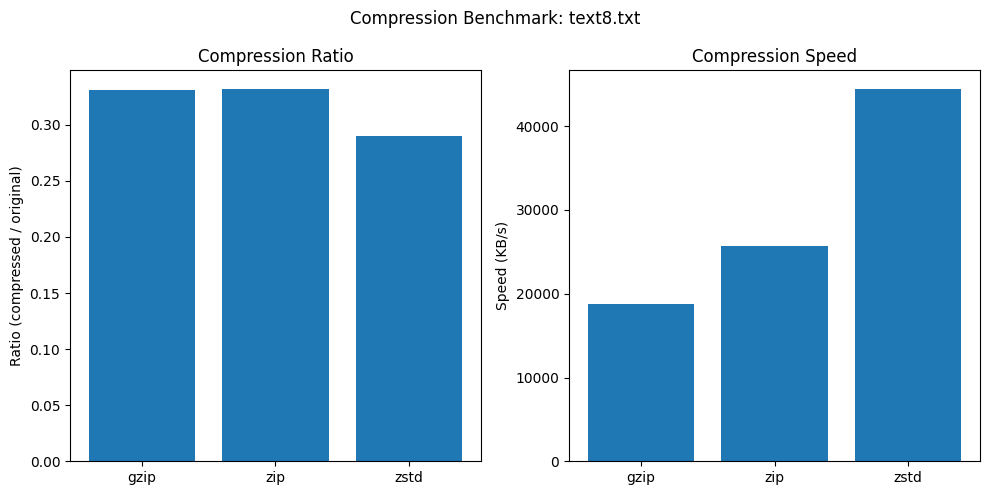

In [21]:
dataset_path = "./data/text8.txt"
output_dir = "compressed_output"

os.makedirs(output_dir, exist_ok=True)
results = benchmark(dataset_path, output_dir)
plot_results(results, os.path.basename(dataset_path))


In [14]:
df = pd.DataFrame(results, columns=["Method", "Compression Ratio", "Speed (KB/s)"])
df.to_csv("benchmark_results.csv", index=False)
df


,Method,Compression Ratio,Speed (KB/s)
0,gzip,0.330621,18500.999849
1,zip,0.331955,25527.341210
2,zstd,0.328337,189299.319844


## PyTorrent


 Benchmark for: train_scenario_docs_chk_0.jsonl (284973.90 KB)

GZIP, Ratio: 0.140, Speed: 17256.81 KB/s
ZIP, Ratio: 0.143, Speed: 60776.86 KB/s
ZSTD, Ratio: 0.148, Speed: 431275.52 KB/s


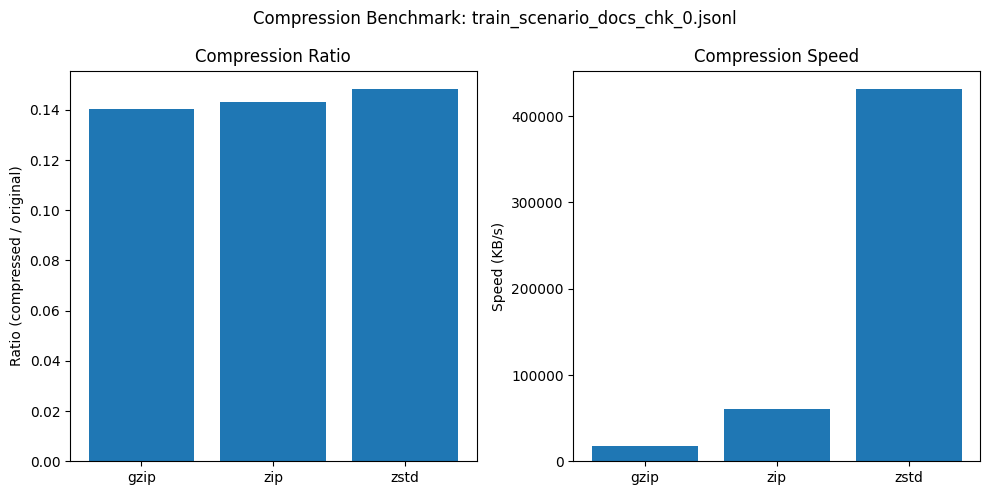

In [16]:
dataset_path_torrent = "./data/train_scenario_docs_chk_0.jsonl"
output_dir = "compressed_output"

os.makedirs(output_dir, exist_ok=True)
results_torrent = benchmark(dataset_path_torrent, output_dir)
plot_results(results_torrent, os.path.basename(dataset_path_torrent))

In [17]:
df_torrent = pd.DataFrame(results_torrent, columns=["Method", "Compression Ratio", "Speed (KB/s)"])
df_torrent.to_csv("benchmark_results_pytorrent.csv", index=False)
df_torrent

,Method,Compression Ratio,Speed (KB/s)
0,gzip,0.140272,17256.807982
1,zip,0.142982,60776.864806
2,zstd,0.148212,431275.524720
